In [77]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import seaborn as sns
import pandas as pd
import numpy as np
import os


## 1. Analysis of Nodal Dataset

### ---1. Node_8 

In [78]:
import pandas as pd

def read_node_data(file_path):
    df = pd.read_csv(file_path,
                     skiprows=3,  # Skip title row
                     sep=r'\s+',  # Use regex to handle variable spaces
                     names=["Time", "Elevation", "Base_Demand", "Initial_Quality", 
                            "Demand", "Head", "Pressure", "Quality"],
                     engine="python")  # More flexible parsing
    df.columns = df.columns.str.strip()

    return df

file_path = "Nodal_Data/Linear_Leak_node_8.csv"  # Adjust this path
node_df = read_node_data(file_path)

node_df.head()  


,Time,Elevation,Base_Demand,Initial_Quality,Demand,Head,Pressure,Quality
0,0:00,0,4,0,0.0,3.33,1.44,0.0
1,0:01,0,4,0,0.0,3.31,1.44,0.0
2,0:02,0,4,0,0.0,3.29,1.43,0.0
3,0:03,0,4,0,0.0,3.27,1.42,0.0
4,0:04,0,4,0,0.0,3.25,1.41,0.0


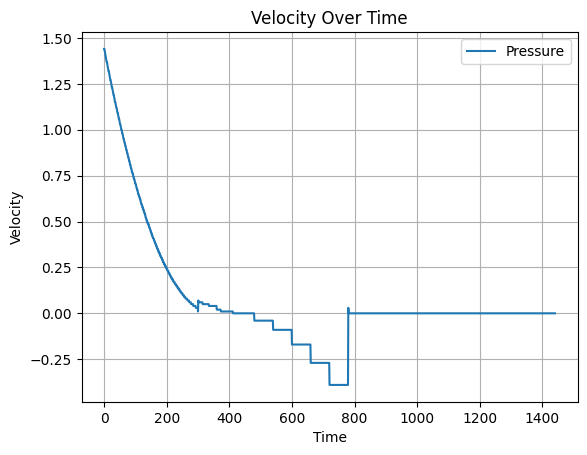

In [79]:
node_df.plot(y='Pressure', kind='line', title='Velocity Over Time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.grid()
plt.show()

In [80]:
def compute_snr(signal):
    signal_power = np.mean(signal ** 2)
    noise_power = np.var(signal)
    if noise_power == 0:
        return float('inf')
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

In [81]:
signal = node_df["Pressure"].to_numpy()
snr = compute_snr(signal)
print(f"SNR: {snr:.2f} dB")

SNR: 0.23 dB


In [82]:
def add_gaussian_noise(signal, snr=10):
    if snr >= 0:
        try:  
            signal_power = np.mean(signal ** 2)
            noise_power = signal_power / (10 ** (snr / 10))
            noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
            noisy_signal = signal + noise
            return noisy_signal
        except Exception as e:
            print(f"Error adding noise: {e}")
            return signal


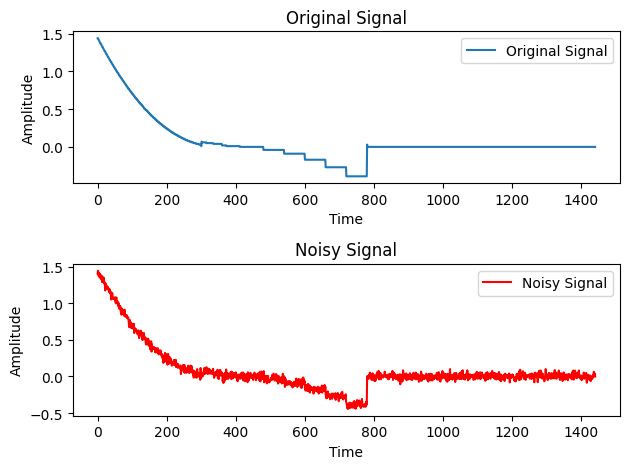

In [83]:
noise_singal = add_gaussian_noise(signal,20)


subplot(2, 1, 1)
plt.plot(signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
subplot(2, 1, 2)
plt.plot(noise_singal, label='Noisy Signal', color='red')
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

# Node 13 

### --Node 13 

In [84]:
def read_node_data(file_path):
    df = pd.read_csv(file_path,
                     skiprows=4,  # Skip title row
                     sep=r'\s+',  # Use regex to handle variable spaces
                     names=["Time", "Elevation", "Base_Demand", "Initial_Quality", 
                            "Demand", "Head", "Pressure", "Quality"],
                     engine="python")  # More flexible parsing
    df.columns = df.columns.str.strip()

    return df

In [85]:
file_path = "Nodal_Data/Random_Leak_node_13.csv"  # Adjust this path
node_df = read_node_data(file_path)

node_df.head()  

,Time,Elevation,Base_Demand,Initial_Quality,Demand,Head,Pressure,Quality
0,0:00,0,5,0,0.0,3.33,1.44,0.0
1,0:01,0,5,0,0.0,3.31,1.44,0.0
2,0:02,0,5,0,0.0,3.29,1.43,0.0
3,0:03,0,5,0,0.0,3.27,1.42,0.0
4,0:04,0,5,0,0.0,3.25,1.41,0.0


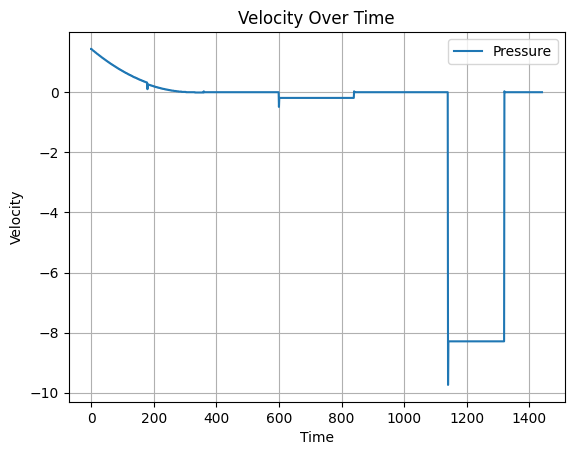

In [86]:
node_df.plot(y='Pressure', kind='line', title='Velocity Over Time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.grid()
plt.show()

SNR: 0.48 dB


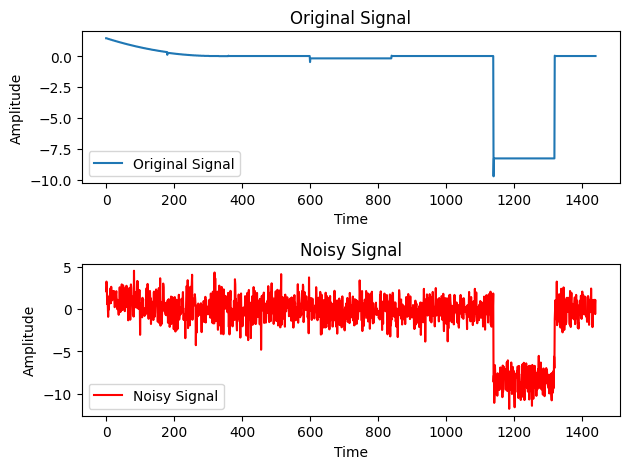

In [87]:
signal = node_df["Pressure"].to_numpy()
snr = compute_snr(signal)
print(f"SNR: {snr:.2f} dB")
noise_singal = add_gaussian_noise(signal,7)


subplot(2, 1, 1)
plt.plot(signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
subplot(2, 1, 2)
plt.plot(noise_singal, label='Noisy Signal', color='red')
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()